# Linear Stability Analysis of Discrete-Time Nonlinear Dynamical Systems

---

Consider the following iterative map $(a > 0,\ b > 0)$

$$x_t = x_{t-1} + a \sin(bx_{t-1})$$

Conduct linear stability analysis to determine whether this model is stable or not at
its equilibrium point $x_{eq} = 0$.

1. Find an equilibrium point

Let $x_{eq} = 0$

2. Calculate the Jacobian matrix

Consider $F'(0) = 1 + a \cos(b\times 0) \times b = 1 + ab > 1$

Implies $\Delta x$ grows exponentially, and thus the equilibrium point
$x_{eq}$ is unstable.

---

Consider the following two-dimensional difference equation model

$$
\begin{align}
x_t &= x_{t-1} + 2x_{t-1}(1 - x_{t-1}) - x_{t-1}y_{t-1}\\
y_t &= y_{t-1} + 2y_{t-1}(1 - y_{t-1}) - x_{t-1}y_{t-1}\\
\end{align}
$$


1. Find all of its equilibrium points.
$$(x_{eq}, y_{eq}) = (0, 0), (1, 0), (0, 1), (2/3, 2/3)$$


2. Calculate the Jacobian matrix at the equilibrium point where $x > 0$ and $y > 0$.

$$J = 
\begin{bmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y}\\
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}\\
\end{bmatrix}
=
\begin{bmatrix}
3-4x-y & -x\\
-y & 3-4y-x\\
\end{bmatrix}
$$

3. Calculate the eigenvalues of the matrix obtained above.

In [1]:
import numpy as np

In [2]:
J = lambda x, y: np.array([[3-4*x-y, -x], [-y, 3-4*y-x]])

In [3]:
x, y = 0, 0
eigvals, eigvect = np.linalg.eig(J(x, y))

In [4]:
eigvals

array([3., 3.])

In [5]:
eigvect

array([[1., 0.],
       [0., 1.]])

In [6]:
x, y = 1, 0
eigvals, eigvect = np.linalg.eig(J(x, y))

In [7]:
eigvals

array([-1.,  2.])

In [8]:
eigvect

array([[ 1.        , -0.31622777],
       [ 0.        ,  0.9486833 ]])

In [9]:
x, y = 0, 1
eigvals, eigvect = np.linalg.eig(J(x, y))

In [10]:
eigvals

array([-1.,  2.])

In [11]:
eigvect

array([[ 0.        ,  0.9486833 ],
       [ 1.        , -0.31622777]])

In [12]:
x, y = 2/3, 2/3
eigvals, eigvect = np.linalg.eig(J(x, y))

In [13]:
eigvals

array([ 0.33333333, -1.        ])

In [14]:
eigvect

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [15]:
from itertools import product
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [16]:
transformation = lambda x, y: np.array([[x+2*x*(1-x)-x*y], [y+2*y*(1-y)-x*y]])

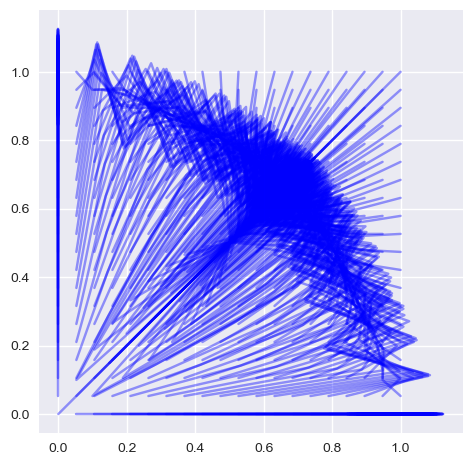

In [19]:
points = product(np.linspace(0, 1, 20), np.linspace(0, 1, 20))

for x0, y0 in points:
    init_vect = np.array([[x0],
                          [y0]])
    states = [init_vect]
    for _ in range(10):
        new_state = transformation(states[-1][0][0], states[-1][1][0])
        states.append(new_state)
        
    res = np.hstack(states).T
    plt.plot(res[:, 0], res[:, 1], c='b', alpha=0.4)
plt.axis('square')
plt.show()

Consider the following two-dimensional difference equation model:

$$
\begin{align}
x_t &= x_{t-1}y_{t-1}\\
y_t &= y_{t-1}(x_{t-1} - 1)\\
\end{align}
$$


1. Find all of its equilibrium points.
$$(x_{eq}, y_{eq}) = (0, 0), (2, 1)$$


2. Calculate the Jacobian matrix at the equilibrium point where $x > 0$ and $y > 0$.

$$J = 
\begin{bmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y}\\
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}\\
\end{bmatrix}
=
\begin{bmatrix}
y & x\\
y & x-1\\
\end{bmatrix}
$$

3. Calculate the eigenvalues of the matrix obtained above.

In [20]:
J = lambda x, y: np.array([[y, x], [y, x-1]])

In [21]:
x, y = 0, 0
eigvals, eigvect = np.linalg.eig(J(x, y))

In [22]:
eigvals

array([ 0., -1.])

In [23]:
eigvect

array([[1., 0.],
       [0., 1.]])

In [24]:
x, y = 2, 1
eigvals, eigvect = np.linalg.eig(J(x, y))

In [25]:
eigvals

array([ 2.41421356, -0.41421356])

In [26]:
eigvect

array([[ 0.81649658, -0.81649658],
       [ 0.57735027,  0.57735027]])

In [32]:
transformation = lambda x, y: np.array([[x*y], [y*(x-1)]])

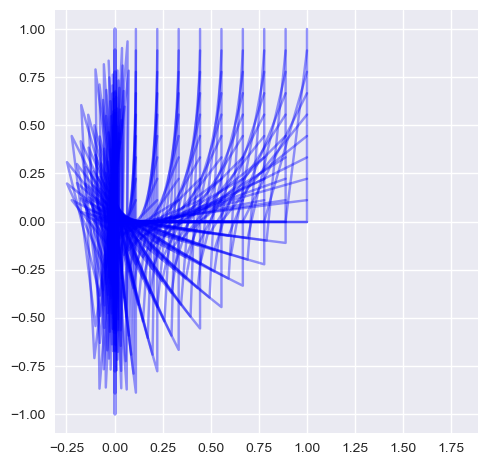

In [34]:
points = product(np.linspace(0, 1, 10), np.linspace(0, 1, 10))

for x0, y0 in points:
    init_vect = np.array([[x0],
                          [y0]])
    states = [init_vect]
    for _ in range(10):
        new_state = transformation(states[-1][0][0], states[-1][1][0])
        states.append(new_state)
        
    res = np.hstack(states).T
    plt.plot(res[:, 0], res[:, 1], c='b', alpha=0.4)
plt.axis('square')
plt.show()